<b>Problem Statement:<b>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

<b>The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.<b>

<b> Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#Scaling
from sklearn.preprocessing import scale

#Train & Test
from sklearn.model_selection import train_test_split


# Import library to find out score (R2)
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

<b>Understand The Data:<b>

In [2]:
#Upload the File
housing = pd.read_csv('train.csv', encoding = 'ISO-8859-1')

In [3]:
#Getting Data Headers
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Data Information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
##Get The Num Of Rows & Coloumns
housing.shape

(1460, 81)

In [6]:
##Check Null Values
housing.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
##Describe the Data
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data cleaning

<b>Check for null in Categorical values

In [8]:
##Null
housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
#Fill None in Place of Null
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    housing[col]=housing[col].fillna('None')

<b>There are few Categorical columns those have the same entry, Will remove those having repeated entry upto 85%. 85% of 1460 entries is 1241

In [10]:
def getRepeatedEntryCount():
    column = []
    categorical_columns = housing.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getRepeatedEntryCount()

In [11]:
columnsToBeRemoved

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [12]:
##Drop the columns those needs to be removed
housing.drop(columnsToBeRemoved, axis = 1, inplace = True)

In [13]:
##Showing Headers
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


<b>Again check for Categorical null values

In [14]:
housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

<b> Check for null in "Numerical Values"

In [15]:
##Check For Data Types
housing.select_dtypes(include=['int64','float']).isnull().sum()[housing.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [16]:
# Impute the null values with median values for LotFrontage and MasVnrArea

housing['LotFrontage'] = housing['LotFrontage'].replace(np.nan, housing['LotFrontage'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.nan, housing['MasVnrArea'].median())

In [17]:
# Replaced the null values with 0 for GarageYrBlt for will handle this column further

housing['GarageYrBlt']=housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [18]:
# <b>Create a new column named IsRemodelled: This column would determine whether the house has been remodelled or not based on the difference between remodelled and built years.<b>

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(checkForRemodel, axis=1)
housing.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [19]:
# Create a new column named as BuiltOrRemodelledAge and will determine the age of the building at the time of selling

def getAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing['BuiltOrRemodelAge'] = housing.apply(getAge, axis=1)
housing.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [20]:
# Create a new column which will indicate if the Garage is old or new.

def getConstructionTime(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing['OldOrNewGarage'] = housing['GarageYrBlt'].apply(getConstructionTime)
housing.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [21]:
##Drop Year coloumns

housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

<b>There are few Neumerical columns those have same entry, Will remove those have repeated entry upto 85%. 85% of 1460 entries is 1241.<b>

In [22]:
def getRepeatedEntryCountNumerical():
    column = []
    numerical_columns = housing.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getRepeatedEntryCountNumerical()
columnsToBeRemoved

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [23]:
##Drop The coloumns those needs to be removed
housing.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing.drop(['MoSold'], axis = 1, inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


<b>Below we have represents the null values percentage wise:<b>

In [24]:
missing_perc = round(100*(housing.isnull().sum()/len(housing.index)), 2)
print(missing_perc)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [25]:
## Check For Duplicates
housing[housing.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


# Find Outliers

In [26]:
##Describe Data
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


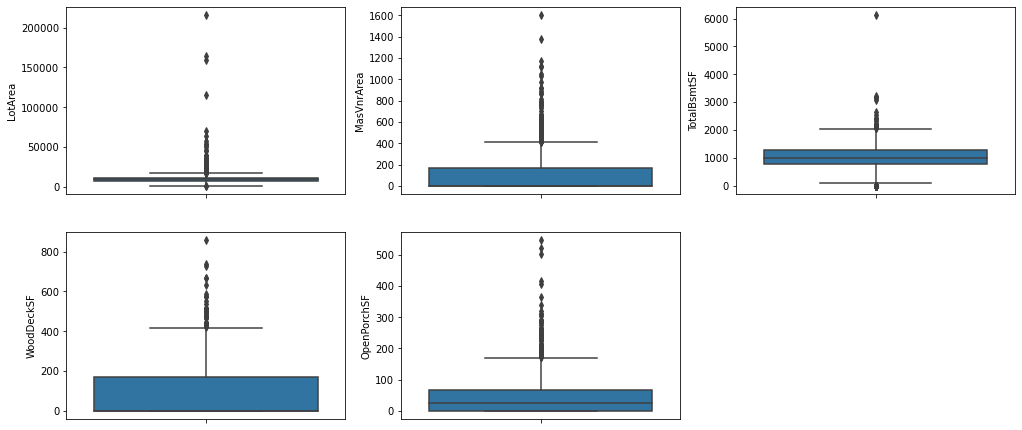

In [27]:
##Plot Graphs:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='tab10', data = housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='tab10', data = housing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='tab10', data = housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='tab10', data = housing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='tab10', data = housing)
plt.show()

In [28]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housing['LotArea'].quantile(0.98)
housing = housing[housing["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housing['MasVnrArea'].quantile(0.98)
housing = housing[housing["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing['TotalBsmtSF'].quantile(0.99)
housing = housing[housing["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housing['WoodDeckSF'].quantile(0.99)
housing = housing[housing["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housing['OpenPorchSF'].quantile(0.99)
housing = housing[housing["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [29]:
round(100*(len(housing)/1460),2)

93.01

# Data Visualisation

<b> - Checking the  distribution of target variable SalePrice </b>

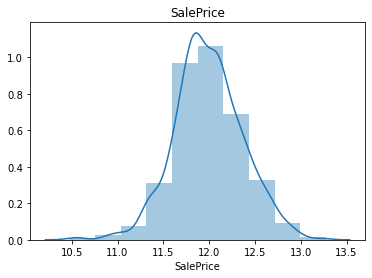

In [30]:
housing['SalePrice'] = np.log1p(housing['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

The  target variable is positively skwed.

<b> Heat Map

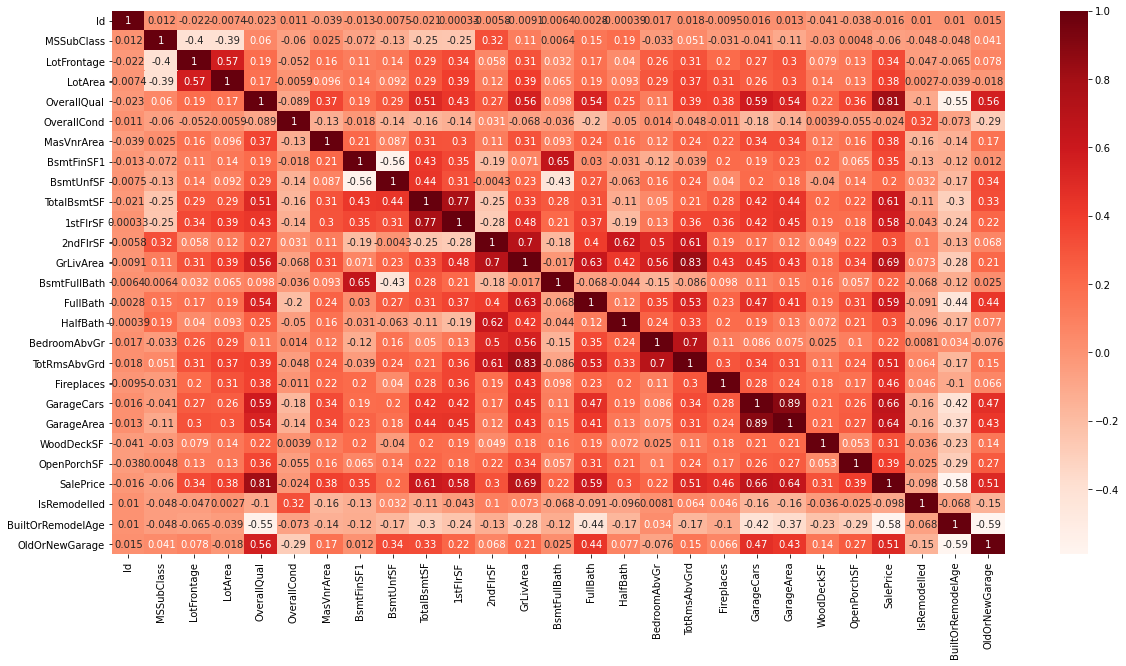

In [31]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housing.corr(), annot = True, cmap="Reds")
plt.show()

In [32]:
# Removing the highly correlated variables

housing.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [33]:
housing.shape

(1358, 47)

# Data Conversion and Preparation

In [34]:
housing['LotShape_num'] = housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing['ExterQual_num'] = housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing['BsmtQual_num'] = housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['BsmtExposure_num'] = housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing['BsmtFinType1_num'] = housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing['HeatingQC_num'] = housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['KitchenQual_num'] = housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['FireplaceQu_num'] = housing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['GarageFinish_num'] = housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing['BldgType_num'] = housing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing['HouseStyle_num'] = housing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing['Fence_num'] = housing['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing['LotConfig_num'] = housing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing['MasVnrType_num'] = housing['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing['SaleCondition_num'] = housing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,HeatingQC_num,KitchenQual_num,FireplaceQu_num,GarageFinish_num,BldgType_num,HouseStyle_num,Fence_num,LotConfig_num,MasVnrType_num,SaleCondition_num
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [35]:
##Drop Few Coloumns:

housing = housing.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,HeatingQC_num,KitchenQual_num,FireplaceQu_num,GarageFinish_num,BldgType_num,HouseStyle_num,Fence_num,LotConfig_num,MasVnrType_num,SaleCondition_num
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [36]:
# creating dummies

d_MSZoning = pd.get_dummies(housing['MSZoning'], prefix='MSZoning', drop_first = True)
housing = pd.concat([housing, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(housing['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing = pd.concat([housing, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(housing['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing = pd.concat([housing, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(housing['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing = pd.concat([housing, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(housing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing = pd.concat([housing, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(housing['Foundation'], prefix='Foundation', drop_first = True)
housing = pd.concat([housing, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(housing['GarageType'], prefix='GarageType', drop_first = True)
housing = pd.concat([housing, d_GarageType], axis = 1)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [37]:
##Again Drop Few Coloumns:

housing = housing.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


### Spliting Into Train & Test Data

In [38]:
##Drop Sale Price
X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 111 entries, MSSubClass to GarageType_None
dtypes: float64(2), int64(36), uint8(73)
memory usage: 510.6 KB


In [40]:
##Check Number of coloumns & Rows again
X.shape

(1358, 111)

In [41]:
y = housing['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

<b>Scaling the Features

In [42]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [43]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

# Considering RFE To Get Best Features

<b>We will try to get best 50 features

In [44]:
## Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

## Running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [45]:
# Assign the 50 features selected using RFE to a dataframe and view them
col = X_train.columns[rfe.support_]
df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [46]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]
X_train_rfe.head(10)

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,GarageType_CarPort
328,-1.151909,0.740183,-0.526853,1.623717,1.152606,0.957298,-0.797204,-0.033260,1.157858,-1.008133,...,2.550051,-0.201527,-0.134131,-0.733443,2.574726,-0.885717,1.142630,-0.134131,-0.060791,-0.08168
1042,1.214461,-0.775908,0.365250,-1.013304,-1.283688,-0.312979,0.582715,0.284106,-0.800263,-1.008133,...,-0.392149,-0.201527,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
318,0.820250,-0.017863,1.257352,0.412442,0.522348,0.257470,-0.797204,-0.543619,-0.800263,-1.008133,...,2.550051,-0.201527,-0.134131,-0.733443,2.574726,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
1050,-1.590935,0.740183,-0.526853,-1.013304,0.940755,1.257225,-0.797204,0.185465,-0.800263,0.841927,...,-0.392149,-0.201527,-0.134131,1.363432,-0.388391,-0.885717,1.142630,-0.134131,-0.060791,-0.08168
83,-0.266941,-2.292000,-3.203159,-1.013304,-0.012578,-0.336503,-0.797204,0.123279,-0.800263,-1.008133,...,-0.392149,-0.201527,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
129,0.254524,-0.775908,-0.526853,0.680531,0.519700,0.254529,-0.797204,-0.545763,-0.800263,0.841927,...,-0.392149,-0.201527,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
997,-0.511766,-0.775908,-2.311057,-1.013304,-0.550151,-0.368848,0.282939,-0.026827,1.157858,-1.008133,...,-0.392149,-0.201527,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
12,0.977381,-0.775908,0.365250,0.782892,-0.280040,-0.633489,-0.797204,-1.193361,1.157858,-1.008133,...,-0.392149,-0.201527,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
1112,0.045661,-0.775908,2.149454,-1.013304,-0.836151,-0.839321,0.701673,0.007483,-0.800263,-1.008133,...,-0.392149,-0.201527,-0.134131,1.363432,-0.388391,-0.885717,1.142630,-0.134131,-0.060791,-0.08168
171,0.550804,0.740183,-0.526853,-1.013304,0.911625,0.689717,0.915799,1.315546,-0.800263,0.841927,...,-0.392149,-0.201527,-0.134131,1.363432,-0.388391,-0.885717,1.142630,-0.134131,-0.060791,-0.08168


Regularization:

Regularization allows to shrink the coefficients to zero by introducing a tuning parameter 'lambda' or 'alpha'. This ensures:

Shrinking of parameters, therefore it is mostly used to prevent multicollinearity.Reduces the model complexity by coefficient shrinkage.The two popular methods used to regularize parameters are:

Ridge Regression
Lasso Regression

Ridge Regression: Ridge regression uses L2 penalty to penalize coefficients. L2 penalty is the penalty equivalent to square of the magnitude of coefficients.

Lasso Regression: Lasso regression uses L1 penalty which is the absolute value of the magnitude of coefficients.

# Model Building and evaluation

<b>Ridge Regression Model

In [47]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# Display Mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5,-0.077867,-0.084073,1
17,6,-0.077918,-0.084087,2
18,7,-0.077966,-0.084102,3
15,4,-0.077818,-0.084102,4
19,8,-0.078013,-0.084114,5
20,9,-0.078056,-0.084125,6
21,10,-0.078096,-0.084138,7
14,3,-0.077771,-0.084184,8
22,20,-0.078416,-0.084255,9
13,2,-0.077729,-0.084283,10


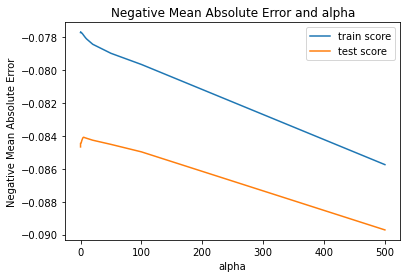

In [49]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [50]:
ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [51]:
# check the coefficient values with lambda = 5.0

alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02230328,  0.06781976,  0.04560507,  0.03246279,  0.04514277,
        0.01443   ,  0.00927222,  0.08855527,  0.01183694,  0.01100282,
        0.01998561,  0.02135318,  0.03642235,  0.01014358, -0.01250822,
       -0.01811553,  0.01376195,  0.01456923,  0.01667056,  0.0183382 ,
        0.0163361 ,  0.01459524, -0.01854577,  0.01453371,  0.06777694,
        0.02722226,  0.10489287,  0.07542535,  0.02596579, -0.01140253,
       -0.00856186,  0.02266905, -0.01509615, -0.00966145,  0.01707021,
       -0.00955568, -0.0133837 , -0.00516625,  0.01233852, -0.04168168,
       -0.03218332,  0.01206437, -0.01686973,  0.03597018,  0.02075844,
        0.02167383,  0.04308288,  0.01773666,  0.00692126, -0.0094755 ])

In [52]:
# Check the Mean squared Error (MSE)

mean_squared_error(y_test, ridge.predict(X_test))

0.013710783577351032

In [53]:
# Insert the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0223
1,OverallQual,0.0678
2,OverallCond,0.0456
3,BsmtFinSF1,0.0325
4,TotalBsmtSF,0.0451
5,1stFlrSF,0.0144
6,2ndFlrSF,0.0093
7,GrLivArea,0.0886
8,BsmtFullBath,0.0118
9,FullBath,0.0110


In [54]:
# Assign the Features and their coefficient values to the dictionary which will be using while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0223,
 'OverallQual': 0.0678,
 'OverallCond': 0.0456,
 'BsmtFinSF1': 0.0325,
 'TotalBsmtSF': 0.0451,
 '1stFlrSF': 0.0144,
 '2ndFlrSF': 0.0093,
 'GrLivArea': 0.0886,
 'BsmtFullBath': 0.0118,
 'FullBath': 0.011,
 'HalfBath': 0.02,
 'Fireplaces': 0.0214,
 'GarageCars': 0.0364,
 'WoodDeckSF': 0.0101,
 'IsRemodelled': -0.0125,
 'BuiltOrRemodelAge': -0.0181,
 'OldOrNewGarage': 0.0138,
 'BsmtQual_num': 0.0146,
 'BsmtExposure_num': 0.0167,
 'HeatingQC_num': 0.0183,
 'KitchenQual_num': 0.0163,
 'GarageFinish_num': 0.0146,
 'BldgType_num': -0.0185,
 'SaleCondition_num': 0.0145,
 'MSZoning_FV': 0.0678,
 'MSZoning_RH': 0.0272,
 'MSZoning_RL': 0.1049,
 'MSZoning_RM': 0.0754,
 'Neighborhood_Crawfor': 0.026,
 'Neighborhood_Edwards': -0.0114,
 'Neighborhood_MeadowV': -0.0086,
 'Neighborhood_NridgHt': 0.0227,
 'Neighborhood_OldTown': -0.0151,
 'Neighborhood_SWISU': -0.0097,
 'Neighborhood_StoneBr': 0.0171,
 'Exterior1st_BrkComm': -0.0096,
 'Exterior1st_CemntBd': -0.0134,
 'Exterior1st_Ply

In [55]:
# Doing RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [56]:
# Method to get the coefficient values

def get(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df['Coefficient'] = temp_df['Features'].apply(get)
temp_df = temp_df.sort_values(by=['Coefficient'], ascending=False)
temp_df = temp_df.head(10)
temp_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.1049
5,GrLivArea,True,1,0.0886
11,MSZoning_RM,True,1,0.0754
1,OverallQual,True,1,0.0678
9,MSZoning_FV,True,1,0.0678
2,OverallCond,True,1,0.0456
4,TotalBsmtSF,True,1,0.0451
14,Foundation_PConc,True,1,0.0431
7,GarageCars,True,1,0.0364
3,BsmtFinSF1,True,1,0.0325


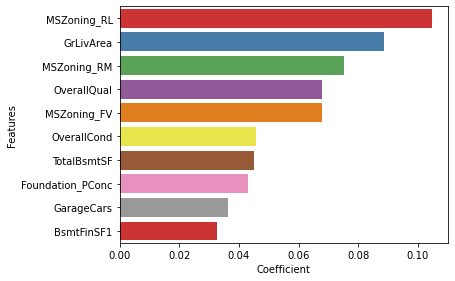

In [57]:
##Plot Best Features
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp_df)
plt.show()

<b> Lasso Regression Model

In [58]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True,verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.077930,-0.084263,1
4,0.0005,-0.078041,-0.084274,2
2,0.0003,-0.077841,-0.084319,3
1,0.0002,-0.077770,-0.084395,4
0,0.0001,-0.077709,-0.084488,5
5,0.001,-0.078717,-0.084782,6
6,0.002,-0.079584,-0.085324,7
7,0.003,-0.080123,-0.085672,8
8,0.004,-0.080606,-0.086078,9
9,0.005,-0.081188,-0.086506,10


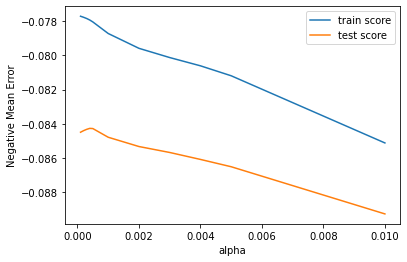

In [60]:
# plotting mean test and train scores with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')

plt.legend(['train score', 'test score'], loc='upper right')

In [61]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0004)

In [62]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.0219477 ,  0.06950135,  0.04537928,  0.03286372,  0.04577466,
        0.00611123, -0.        ,  0.0998619 ,  0.01101981,  0.00943301,
        0.01898491,  0.02119659,  0.03689155,  0.00992809, -0.0121443 ,
       -0.01830826,  0.013156  ,  0.01345448,  0.01664257,  0.01785536,
        0.01613982,  0.01481986, -0.01797241,  0.01447809,  0.06867471,
        0.02715573,  0.10707477,  0.07582037,  0.02534044, -0.01093994,
       -0.00819895,  0.0217776 , -0.01485445, -0.00977658,  0.01612126,
       -0.00934986, -0.00035995, -0.00467573,  0.01164387, -0.03151998,
       -0.02982943,  0.        , -0.01607397,  0.02642347,  0.01799128,
        0.01939112,  0.04140751,  0.01653636,  0.00632644, -0.00895779])

In [63]:
# Get the Mean squared error (MSE)

mean_squared_error(y_test, lasso.predict(X_test))

0.013535752335222997

In [64]:
# Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0219
1,OverallQual,0.0695
2,OverallCond,0.0454
3,BsmtFinSF1,0.0329
4,TotalBsmtSF,0.0458
5,1stFlrSF,0.0061
6,GrLivArea,0.0999
7,BsmtFullBath,0.0110
8,FullBath,0.0094
9,HalfBath,0.0190


In [65]:
# Insert the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.02194770375100588,
 'OverallQual': 0.06950134834645684,
 'OverallCond': 0.04537928153017685,
 'BsmtFinSF1': 0.03286371862467369,
 'TotalBsmtSF': 0.04577465842494203,
 '1stFlrSF': 0.006111233115175591,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.09986190123179003,
 'BsmtFullBath': 0.011019807358195948,
 'FullBath': 0.00943301381337613,
 'HalfBath': 0.018984908519164255,
 'Fireplaces': 0.021196585613091446,
 'GarageCars': 0.03689155285099351,
 'WoodDeckSF': 0.00992809193157203,
 'IsRemodelled': -0.012144296662570726,
 'BuiltOrRemodelAge': -0.018308263350096384,
 'OldOrNewGarage': 0.013156001425136048,
 'BsmtQual_num': 0.013454480844421664,
 'BsmtExposure_num': 0.016642570904414903,
 'HeatingQC_num': 0.017855360015972405,
 'KitchenQual_num': 0.016139823960825195,
 'GarageFinish_num': 0.014819859102452114,
 'BldgType_num': -0.017972411441745884,
 'SaleCondition_num': 0.014478086478087309,
 'MSZoning_FV': 0.06867470660104591,
 'MSZoning_RH': 0.027155733656333565,
 'MSZoning_RL': 0.1070

<b>Applying RFE to minimise the features upto 15

In [66]:
##Linear Regression Model
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [67]:
# Method to get the coefficient values

def get(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(get)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.107075
5,GrLivArea,True,1,0.099862
12,MSZoning_RM,True,1,0.075820
1,OverallQual,True,1,0.069501
9,MSZoning_FV,True,1,0.068675
4,TotalBsmtSF,True,1,0.045775
2,OverallCond,True,1,0.045379
14,Foundation_PConc,True,1,0.041408
7,GarageCars,True,1,0.036892
3,BsmtFinSF1,True,1,0.032864


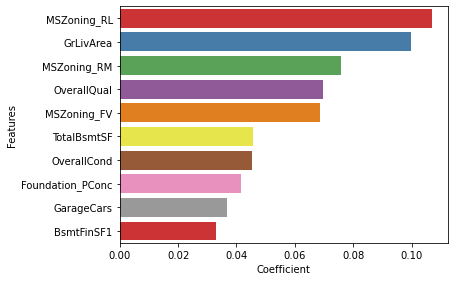

In [68]:
# Bar plot to determine the variables that would affect the pricing most while using ridge regression Model

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

Hence we can see the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

In [69]:
##Top 10 Features per lasso regression
model_parameters_lasso = list(lm.coef_)
model_parameters_lasso.insert(0, lm.intercept_)
model_parameters_lasso = [round(x, 3) for x in model_parameters_lasso]

cols_lasso = X_train_rfe.loc[:, X_train_rfe.columns != 'SalePrice'].columns
cols_lasso = cols_lasso.insert(0, "constant")
var_coeff_lasso = list(zip(cols_lasso, model_parameters_lasso))
lasso_df = pd.DataFrame(var_coeff_lasso)
lasso_df.columns = ['feature_name' , 'coeff']
lasso_df['abs_coeff'] = abs(lasso_df.coeff)
lasso_df[lasso_df['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(10)

,feature_name,coeff,abs_coeff
26,MSZoning_RH,0.136,0.136
27,MSZoning_RL,0.103,0.103
7,2ndFlrSF,0.101,0.101
24,SaleCondition_num,0.084,0.084
2,OverallQual,0.067,0.067
39,Exterior1st_Stucco,-0.053,0.053
42,Exterior2nd_CmentBd,0.046,0.046
5,TotalBsmtSF,0.046,0.046
45,Exterior2nd_Wd Sdng,0.045,0.045
3,OverallCond,0.045,0.045


Since Lasso will penalize more on the dataset and has eliminated 4 more features lets consider the above 10 features which provide us with below inferences.

- Houses being in Residential Zoning areas seem to have a positive effect on the  selling price
- Houses 2ndFlrSF, OverallQual & Exterior have a positive effect on the  selling price
- New Houses seem to selling at higher prices

In [70]:
##Top 10 Features per Ridge regression
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

cols = X_train_rfe.loc[:, X_train_rfe.columns != 'SalePrice'].columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))


ridge_df = pd.DataFrame(var_coeff)
ridge_df.columns = ['feature_name' , 'coeff']
ridge_df['abs_coeff'] = abs(ridge_df.coeff)
ridge_df[ridge_df['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(10)

,feature_name,coeff,abs_coeff
27,MSZoning_RL,0.105,0.105
8,GrLivArea,0.089,0.089
28,MSZoning_RM,0.075,0.075
2,OverallQual,0.068,0.068
25,MSZoning_FV,0.068,0.068
3,OverallCond,0.046,0.046
5,TotalBsmtSF,0.045,0.045
47,Foundation_PConc,0.043,0.043
40,Exterior1st_VinylSd,-0.042,0.042
13,GarageCars,0.036,0.036


The scores produced by Ridge Regression doesn't vary much, both RMSE and R2 of train and test data sets are not far from each other.

Therefore by lookig at the scores Ridge is the best model for the data. Having said that let us look at the features that are positively and negatively correlated with the Sale Price using Ridge Cross Validation method.

The top ten important features that are positively correlated with Sale Price are:

1. LotArea
2. OverallQual
3. OverallCond	
4. BsmtFinSF1	
5. TotalBsmtSF	
6. 1stFlrSF	
7. 2ndFlrSF	
8. GrLivArea	
9. BsmtFullBath	
10. FullBath	

The presence/ increase of the above features increases the Sale Price of a house

The top ten important features that are negatively correlated with the Sale Price are:

1. IsRemodelled
2. BuiltOrRemodelAge
3. BldgType_num
4. Neighborhood_Edwards
5. Neighborhood_MeadowV
6. Neighborhood_OldTown
7. Neighborhood_SWISU
8. Exterior1st_BrkComm
9. Exterior1st_CemntBd
10. Exterior1st_Plywood

The absence/ decrease of the above features increases the Sale Price of a house.

<b> -Problem Statement Part II </b>

Q1) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [71]:
##Ridge regression

alphadob = 10.0
ridgedob = Ridge(alpha=alphadob)

ridgedob.fit(X_train_rfe,y_train)
ridgedob.coef_

array([ 0.02221333,  0.06823782,  0.04574739,  0.03240402,  0.04494296,
        0.02338754,  0.01931206,  0.07663921,  0.01202692,  0.01142288,
        0.02048947,  0.02181363,  0.03600241,  0.01013999, -0.01298612,
       -0.01856995,  0.01349543,  0.0145027 ,  0.01653549,  0.01823104,
        0.01671321,  0.01440966, -0.01822066,  0.01493339,  0.05785394,
        0.02214169,  0.08573552,  0.05824605,  0.02573365, -0.01119953,
       -0.00863175,  0.02211088, -0.01449267, -0.00897173,  0.01665265,
       -0.00945041, -0.0105849 , -0.0052303 ,  0.0121689 , -0.03467611,
       -0.03054664,  0.00960536, -0.01661087,  0.02943941,  0.01925833,
        0.02033275,  0.04150524,  0.01739216,  0.00611762, -0.00985946])

Coeff values donot seem to have a major change as compared to model which has alpha set to 5.0

In [72]:
model_parametersdob = list(ridgedob.coef_)
model_parametersdob.insert(0, ridgedob.intercept_)
model_parametersdob = [round(x, 3) for x in model_parametersdob]

colsdob = X_train_rfe.loc[:, X_train_rfe.columns != 'SalePrice'].columns
colsdob = colsdob.insert(0, "constant")
var_coeffdob = list(zip(colsdob, model_parametersdob))

In [73]:
y_pred_ridge_traindob = ridgedob.predict(X_train_rfe)

In [74]:
# Import library to find out score (R2)
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_traindob))
print('Mse for test dataset')
print(mean_squared_error(y_train,y_pred_ridge_traindob))

r2_score in train dataset
r2_score for ridge: 0.9184459058138614
Mse for test dataset
0.011474292878886589


In [75]:
y_pred_testdob = ridgedob.predict(X_test)

In [76]:
print(r2_score(y_true=y_test, y_pred=y_pred_testdob),'\n')
print('Mse for test dataset')
print(mean_squared_error(y_test,y_pred_testdob))

0.9016997144806115 

Mse for test dataset
0.013675818077007764


In [77]:
##Top 10 Features per ridge regression after doubling lambda
ridge_dfdob = pd.DataFrame(var_coeffdob)
ridge_dfdob.columns = ['feature_name' , 'coeff']
ridge_dfdob['abs_coeff'] = abs(ridge_dfdob.coeff)
ridge_dfdob[ridge_dfdob['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(10)

,feature_name,coeff,abs_coeff
27,MSZoning_RL,0.086,0.086
8,GrLivArea,0.077,0.077
2,OverallQual,0.068,0.068
25,MSZoning_FV,0.058,0.058
28,MSZoning_RM,0.058,0.058
3,OverallCond,0.046,0.046
5,TotalBsmtSF,0.045,0.045
47,Foundation_PConc,0.042,0.042
13,GarageCars,0.036,0.036
40,Exterior1st_VinylSd,-0.035,0.035


<b>lasso Regression

In [78]:

lmdob = Lasso(alpha=0.0008)
lmdob.fit(X_train_rfe, y_train)

# predict
y_train_preddob = lmdob.predict(X_train_rfe)
print(r2_score(y_true=y_train, y_pred=y_train_preddob))

0.917534687290443


In [79]:
# lasso model parameters
model_parameters_lassodob = list(lmdob.coef_)
model_parameters_lassodob.insert(0, lmdob.intercept_)
model_parameters_lassodob = [round(x, 3) for x in model_parameters_lassodob]

cols_lassodob = X_train_rfe.loc[:, X_train_rfe.columns != 'SalePrice'].columns
cols_lassodob = cols_lassodob.insert(0, "constant")
var_coeff_lassodob = list(zip(cols_lassodob, model_parameters_lassodob))

In [80]:
var_coeff_lasso_finaldob = [x for x in var_coeff_lassodob if abs(x[1] != 0)]
len(var_coeff_lasso_finaldob)

48

In [81]:
y_test_pred_lassodob = lmdob.predict(X_test)

print('r2_score for test dataset')
print(r2_score(y_true=y_test, y_pred=y_test_pred_lassodob),'\n')
print('Mse for test dataset')
print(mean_squared_error(y_test,y_test_pred_lassodob))  

r2_score for test dataset
0.9040992151266339 

Mse for test dataset
0.013341992654860923


In [82]:
##Top 10 Features per lasso regression after doubling lambda
lasso_dfdob = pd.DataFrame(var_coeff_lassodob)
lasso_dfdob.columns = ['feature_name' , 'coeff']
lasso_dfdob['abs_coeff'] = abs(lasso_dfdob.coeff)
lasso_dfdob[lasso_dfdob['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(10)

,feature_name,coeff,abs_coeff
8,GrLivArea,0.099,0.099
27,MSZoning_RL,0.079,0.079
2,OverallQual,0.072,0.072
25,MSZoning_FV,0.054,0.054
28,MSZoning_RM,0.049,0.049
3,OverallCond,0.046,0.046
5,TotalBsmtSF,0.046,0.046
47,Foundation_PConc,0.038,0.038
13,GarageCars,0.037,0.037
4,BsmtFinSF1,0.033,0.033


Q3) After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [83]:
##lets drop the top5 features from the train and test datasets and rebuild the model
X_trainnewdf = X_train_rfe
X_trainnewdf.drop(['GrLivArea','OverallQual','MSZoning_RL','MSZoning_FV','MSZoning_RM'],axis =1 , inplace = True)

X_testnewdf = X_test
X_testnewdf.drop(['GrLivArea','OverallQual','MSZoning_RL','MSZoning_FV','MSZoning_RM'],axis =1 , inplace = True)

In [84]:
# grid search CV

# specify range of hyperparameters
params_lassonew = {'alpha': [0.00001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004]}

# grid search
# lasso model
model = Lasso()
folds = 5
model_cv_lassonew = GridSearchCV(estimator = model, param_grid = params_lassonew, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv_lassonew.fit(X_trainnewdf, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
cv_results_lassonew = pd.DataFrame(model_cv_lassonew.cv_results_)
cv_results_lassonew.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018832,0.006725,0.004166,0.000318,1e-05,{'alpha': 1e-05},-0.104801,-0.091247,-0.083216,-0.097912,...,-0.093355,0.007391,12,-0.083071,-0.085925,-0.087642,-0.085702,-0.086576,-0.085783,0.001514
1,0.014607,0.005084,0.005292,0.002195,0.0001,{'alpha': 0.0001},-0.104831,-0.091262,-0.083040,-0.097630,...,-0.093313,0.007394,11,-0.083086,-0.085913,-0.087677,-0.085708,-0.086534,-0.085784,0.001513
2,0.009047,0.001674,0.003483,0.001466,0.0002,{'alpha': 0.0002},-0.104881,-0.091250,-0.082849,-0.097387,...,-0.093272,0.007419,10,-0.083102,-0.085867,-0.087723,-0.085745,-0.086512,-0.085790,0.001516
3,0.006156,0.000271,0.002385,0.000120,0.0003,{'alpha': 0.0003},-0.104935,-0.091245,-0.082644,-0.097154,...,-0.093235,0.007451,8,-0.083090,-0.085848,-0.087736,-0.085787,-0.086517,-0.085796,0.001524
4,0.006022,0.000237,0.002605,0.000510,0.0004,{'alpha': 0.0004},-0.104988,-0.091236,-0.082454,-0.096921,...,-0.093199,0.007483,7,-0.083082,-0.085832,-0.087756,-0.085848,-0.086523,-0.085808,0.001532


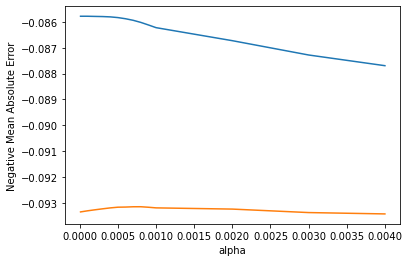

In [86]:
cv_results_lassonew['param_alpha'] = cv_results_lassonew['param_alpha'].astype('float32')
plt.plot(cv_results_lassonew['param_alpha'], cv_results_lassonew['mean_train_score'])
plt.plot(cv_results_lassonew['param_alpha'], cv_results_lassonew['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.tight_layout
plt.show()

In [87]:
# model with optimal alpha as 0.0001
# lasso regression

lmnew = Lasso(alpha=0.0001)
lmnew.fit(X_trainnewdf, y_train)
# predict
y_train_prednew = lmnew.predict(X_trainnewdf)
print(r2_score(y_true=y_train, y_pred=y_train_prednew))

0.9015088213002398


In [88]:
y_test_pred_lassonew = lmnew.predict(X_testnewdf)
print(r2_score(y_true=y_test, y_pred=y_test_pred_lassonew))

0.8733906687933479


In [89]:
model_parameters_lassonew = list(lmnew.coef_)
model_parameters_lassonew.insert(0, lmnew.intercept_)
model_parameters_lassonew = [round(x, 3) for x in model_parameters_lassonew]

cols_lassonew = X_trainnewdf.loc[:, X_trainnewdf.columns != 'SalePrice'].columns
cols_lassonew = cols_lassonew.insert(0, "constant")
var_coeff_lassonew = list(zip(cols_lassonew, model_parameters_lassonew))

In [90]:
##Top 5 Features per new lasso regression model
lasso_dfdobnew = pd.DataFrame(var_coeff_lassonew)
lasso_dfdobnew.columns = ['feature_name' , 'coeff']
lasso_dfdobnew['abs_coeff'] = abs(lasso_dfdobnew.coeff)
lasso_dfdobnew[lasso_dfdobnew['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(5)

,feature_name,coeff,abs_coeff
6,2ndFlrSF,0.101,0.101
5,1stFlrSF,0.086,0.086
35,Exterior1st_VinylSd,-0.061,0.061
4,TotalBsmtSF,0.056,0.056
2,OverallCond,0.053,0.053
